<a href="https://colab.research.google.com/github/ElaineD24/Shopify_Technical_Challenge_Summer_2022/blob/main/Shopify_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import data

In [ ]:
# data = pd.read_csv('/Users/wenyuedeng/Documents/UofT/CSC 2701/Shopify/challenge_data.csv')
from google.colab import files
files.upload()



In [4]:
data_sn = pd.read_csv('challenge_data.csv' , encoding='latin-1')


## Exploratory Data Analysis (EDA)

In [5]:
data_sn.head() 

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
data_sn.shape

(5000, 7)

In [7]:
# check the statistics of order_amount and total_items
data_sn[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


# **Q1.a Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

From the statistics above, we can detect 2 main issues:

1. We noticed that the mean (3145.13) (AOV in this case) of the '**order_amount**'  is way greater than the median (284), and the max value (704000) of 'order_amount' is too large for a single order. This may caused by some outliers such as some users made a huge purchase in a single order or the items in some shops are overpricing.

2. We noticed that the max value (2000) of '**total_items**' is too large for a single order of sneakers for a normal customer and is way larger than the median or mean. This may caused by some outliers such as some users made a huge purchase in a single order.




## Shop #78

We can check the price for a single item in a single order first.

In [8]:
# copy the dataset
data_cp = data_sn
# add a new column which represents the single item price
data_cp['item_price'] = data_cp['order_amount'] / data_cp['total_items']
data_cp[['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items', 'item_price']].head()

,order_id,shop_id,user_id,order_amount,total_items,item_price
0,1,53,746,224,2,112.0
1,2,92,925,90,1,90.0
2,3,44,861,144,1,144.0
3,4,18,935,156,1,156.0
4,5,18,883,156,1,156.0


In [9]:
data_cp[['item_price']].describe()

,item_price
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


From the statistic of the 'item_price' above, we noticed that the max value (25725) is way too large for a single sneaker to be considered as an affordable item, and it is way larger than the median value (153).

Let's plot the 'shop_id' vs 'item_price' to get a rough idea of this dataset.

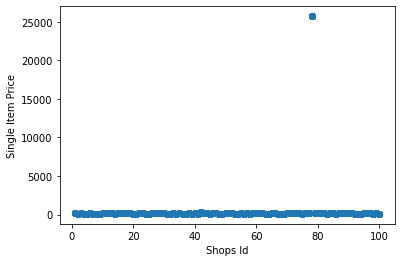

In [10]:
plt.scatter(data_cp['shop_id'], data_cp['item_price'])
plt.xlabel('Shops Id')
plt.ylabel('Single Item Price')
plt.show()

It is clear that we have an outlier which has the 'item_price' around 25000. Let's sort the data based on 'item_price'.

In [11]:
data_cp_sort = data_cp.sort_values(by=['item_price'], ascending=False)
data_cp_sort.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0


We noticed that shop #78 that has a $25725 item price is overpricing compared to the median (153), which leads to a high average of 'item_price'. 

Therefore, shop #78 can be considered as an outlier.

Let's group the dataset by 'shop_id' and sort it by 'item_price' to get a better view of this problem.

In [12]:
data_grouped_shopid = data_cp.groupby(data_cp['shop_id'])
data_grouped_shopid['item_price'].mean().reset_index().sort_values(by=['item_price'], ascending=False).head()

,shop_id,item_price
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


We confirm that the shop #78 is overpricing.

In [13]:
data_cp[data_cp['shop_id'] != 78][['item_price']].describe()

,item_price
count,4954.000000
mean,152.475575
std,31.260218
min,90.000000
25%,132.000000
50%,153.000000
75%,168.000000
max,352.000000


After calculating the average single item price exclude shop #78, we got 152.48 which dropped from 387.74 and makes the mean value and the max value look more reasonable.

## User #607

Now let's look into the 'total_items' issue, which has a max value of 2000.

In [14]:
# copy the dataset
data_cp2 = data_sn

Let's plot the 'shop_id' vs 'total_items' to get a rough idea of this dataset.

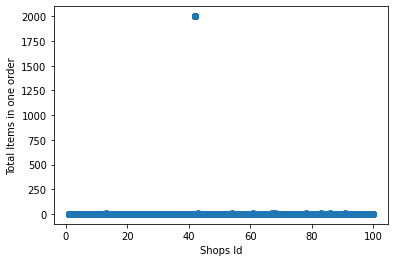

In [15]:
# plot the shop_id vs total_items
plt.scatter(data_cp2['shop_id'], data_cp2['total_items'])
plt.xlabel('Shops Id')
plt.ylabel('Total Items in one order')
plt.show()

It is clear that we have an outlier which has the 'total_items' around 2000. Let's sort the data based on 'total_items'.

In [16]:
# sort the data based on total_items
data_cp2_sort = data_cp2.sort_values(by=['total_items'], ascending=False)
data_cp2_sort.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0


We noticed that the user #607 made a lot of repeated large purchase with a 'total_items' value of 2000 at shop #42, this also leads to the max value of 'order_amount' in our analysis before, which is 704000.

Let's check if user #607 also made large purchase at other shops.

In [17]:
# check statistic when user is #607 and shop is not #42
data_cp2[(data_cp2['user_id'] == 607) & (data_cp2['shop_id'] != 42)].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price


It turns out that user #607 **only** made large purchase at shop #42.

Also, check if other purchases at shop #42 are normal or not, to see if there's any specific shopping constraint at shop #42 such as customers must buy at least 20000 items at shop #42.

In [18]:
# check statistic when user is not #607 and shop is #42
data_cp2[(data_cp2['user_id'] != 607) & (data_cp2['shop_id'] == 42)].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21,352.0
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34,352.0
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22,352.0


It turns out that **only** user #607 made large purchase at shop #42, so it's not the issue of the shop. One of the reasons might be the user #607 is owning a business.

Let's check the statistic of 'total_items' exclude user #607.

In [19]:
# check the statistic of 'total_items' exclude user #607
data_cp2[data_cp2['user_id'] != 607][['total_items']].describe()

,total_items
count,4983.00000
mean,1.99398
std,0.98318
min,1.00000
25%,1.00000
50%,2.00000
75%,3.00000
max,8.00000


The statistic looks more reasonable compared to the original one.

## Conclude

If we remove both shop #78 and user #607 and check the statistic:

In [20]:
# get the statistic of the dataset exclude the user 607 and shop 78
data_sn[(data_sn['user_id'] != 607) & (data_sn['shop_id'] != 78)][['user_id', 'shop_id', 'order_amount', 'total_items', 'item_price']].describe()

,user_id,shop_id,order_amount,total_items,item_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,849.752279,49.846465,302.580514,1.994734,151.788536
std,86.840313,29.061131,160.804912,0.982821,29.034215
min,700.000000,1.000000,90.000000,1.000000,90.000000
25%,775.000000,24.000000,163.000000,1.000000,132.000000
50%,850.000000,50.000000,284.000000,2.000000,153.000000
75%,925.000000,74.000000,387.000000,3.000000,166.000000
max,999.000000,100.000000,1760.000000,8.000000,352.000000


After removing shop #78 and user #607, the average order value (AOV) dropped from 3145.13 dollars to 302.58 dollars. The average single item price dropped from 387.74 dollars to 151.79 dollars. All the prices seems much more affordable as sneakers. Also, the statistics for 'total_items' seems much more reasonable for normal customers.

# **Q1.b What metric would you report for this dataset?**

If we remove the outliers, the AOV would be 302.58 dollars. 

If we don't want to remove them, we can consider the **median** value to better represent the data. Since the data is skewed, the average won't be the best to represent the data.

# **Q1.c What is its value?**

In [24]:
# get the median of the dataset without the outliers
np.median(data_sn[(data_sn['user_id'] != 607) & (data_sn['shop_id'] != 78)][['order_amount']])

284.0

In [25]:
# get the median of the original dataset
np.median(data_sn[['order_amount']])

284.0

The median is 284 dollars with or without the outliers.